In [2]:
import pandas as pd;

In [3]:
df = pd.read_csv('./DailyDelhiClimateTest.csv')

In [4]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [5]:
df['meantemp_ewma'] = None

In [6]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_ewma
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,None
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,None
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,None
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,None
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,None
...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,None
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,None
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,None
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,None


In [25]:
ewma = df['meantemp'][0]
df.at[0,'meantemp_ewma'] = ewma
# df['meantemp_ewma'][0] = ewma
beta = 0.9

for i in range(len(df)):
    ewma = ewma*beta + (1-beta)*df['meantemp'][i]
    # df['meantemp_ewma'] = ewma
    df.at[i,'meantemp_ewma'] = ewma

In [26]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_ewma
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,15.913043
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,16.171739
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,16.265676
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,16.509109
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,16.697087
...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,30.640030
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,31.001027
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,31.190924
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,31.359332


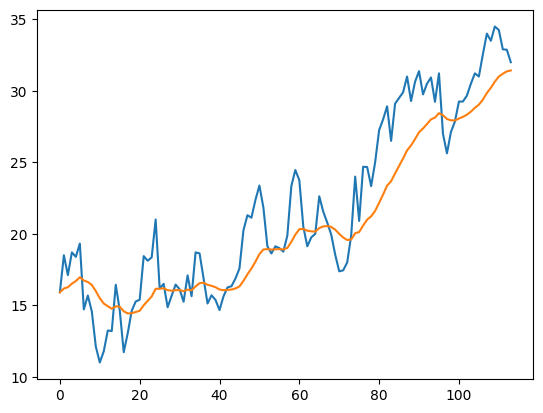

In [27]:
import matplotlib.pyplot as plt

plt.plot(df['meantemp'])
plt.plot(df['meantemp_ewma'])